In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def build_model(width, height, depth, filters=(32, 64), latent_dim=16):
    inputs = keras.layers.Input(shape=(width, height, depth))
    x = inputs
    
    # Encoder
    for f in filters:
        x = keras.layers.Conv2D(f, (3, 3), strides=2, padding='same')(x)
        x = keras.layers.LeakyReLU(alpha=0.2)(x)
        x = keras.layers.BatchNormalization(axis=-1)(x)
    
    volumn_size = x.shape
    x = keras.layers.Flatten()(x)
    latent = keras.layers.Dense(latent_dim, name='encoded')(x)
    
    # Decoder
    x = keras.layers.Dense(np.prod(volumn_size[1:]))(latent)
    x = keras.layers.Reshape((volumn_size[1], volumn_size[2], volumn_size[3]))(x)
    
    for f in filters[::-1]:
        x = keras.layers.Conv2DTranspose(f, (3, 3), strides=2, padding='same')(x)
        x = keras.layers.LeakyReLU(alpha=0.2)(x)
        x = keras.layers.BatchNormalization(axis=-1)(x)
    x = keras.layers.Conv2DTranspose(depth, (3, 3), padding='same')(x)
    outputs = keras.layers.Activation('sigmoid', name='decoded')(x)
    
    autoencoder = keras.Model(inputs, outputs, name='autoencoder')
    return autoencoder

In [3]:
autoencoder = build_model(224, 224, 3)

In [4]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 112, 112, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 56, 56, 64)        0         
                                                       

In [5]:
path = r'C:\Users\aband\OneDrive\桌面\music'
import os

os.listdir(path)

['LINE_ALBUM_音樂會2_220901_0.jpg',
 'LINE_ALBUM_音樂會2_220901_1.jpg',
 'LINE_ALBUM_音樂會2_220901_10.jpg',
 'LINE_ALBUM_音樂會2_220901_100.jpg',
 'LINE_ALBUM_音樂會2_220901_101.jpg',
 'LINE_ALBUM_音樂會2_220901_102.jpg',
 'LINE_ALBUM_音樂會2_220901_103.jpg',
 'LINE_ALBUM_音樂會2_220901_104.jpg',
 'LINE_ALBUM_音樂會2_220901_105.jpg',
 'LINE_ALBUM_音樂會2_220901_106.jpg',
 'LINE_ALBUM_音樂會2_220901_107.jpg',
 'LINE_ALBUM_音樂會2_220901_108.jpg',
 'LINE_ALBUM_音樂會2_220901_109.jpg',
 'LINE_ALBUM_音樂會2_220901_11.jpg',
 'LINE_ALBUM_音樂會2_220901_110.jpg',
 'LINE_ALBUM_音樂會2_220901_111.jpg',
 'LINE_ALBUM_音樂會2_220901_112.jpg',
 'LINE_ALBUM_音樂會2_220901_113.jpg',
 'LINE_ALBUM_音樂會2_220901_114.jpg',
 'LINE_ALBUM_音樂會2_220901_115.jpg',
 'LINE_ALBUM_音樂會2_220901_116.jpg',
 'LINE_ALBUM_音樂會2_220901_117.jpg',
 'LINE_ALBUM_音樂會2_220901_118.jpg',
 'LINE_ALBUM_音樂會2_220901_119.jpg',
 'LINE_ALBUM_音樂會2_220901_12.jpg',
 'LINE_ALBUM_音樂會2_220901_120.jpg',
 'LINE_ALBUM_音樂會2_220901_121.jpg',
 'LINE_ALBUM_音樂會2_220901_122.jpg',
 'LINE_ALBUM_音樂會2_220901_12

In [6]:
images = []

for i in range(len(os.listdir(path))):
    

    image = tf.keras.utils.load_img(
        path + '\\' + os.listdir(path)[i], 
        target_size=(224, 224, 3)
    )
    images.append(image)

In [7]:
# image = tf.keras.preprocessing.image.load_img(image_path)

for i in range(len(images)):
    images[i] = tf.keras.preprocessing.image.img_to_array(images[i])

input_arr = np.array(images)  # Convert single image to a batch.
# predictions = autoencoder.predict(input_arr)

In [8]:
input_arr = input_arr / 255.0

In [9]:
input_arr.shape

(443, 224, 224, 3)

In [10]:
# 打散

np.random.shuffle(input_arr)

In [11]:
# 拆分資料
num = 350

train_ds = input_arr[:num]
test_ds = input_arr[num:]

In [12]:
autoencoder.compile(
    optimizer=keras.optimizers.Adam(),
    loss='mse',
    metrics=['mse']
)

In [14]:
autoencoder.fit(
    x=train_ds,
    y=train_ds,
    epochs=30,
    batch_size=16,
    validation_data=(test_ds, test_ds)
)

Epoch 1/30
22/22 [==============================] - 42s 2s/step - loss: 0.0744 - mse: 0.0744 - val_loss: 0.0734 - val_mse: 0.0734
Epoch 2/30
22/22 [==============================] - 49s 2s/step - loss: 0.0562 - mse: 0.0562 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 3/30
22/22 [==============================] - 45s 2s/step - loss: 0.0501 - mse: 0.0501 - val_loss: 0.0660 - val_mse: 0.0660
Epoch 4/30
22/22 [==============================] - 52s 2s/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0656 - val_mse: 0.0656
Epoch 5/30
22/22 [==============================] - 57s 3s/step - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0644 - val_mse: 0.0644
Epoch 6/30
22/22 [==============================] - 60s 3s/step - loss: 0.0402 - mse: 0.0402 - val_loss: 0.0659 - val_mse: 0.0659
Epoch 7/30
22/22 [==============================] - 45s 2s/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 8/30
22/22 [==============================] - 44s 2s/step - loss: 0.0356 - mse: 0.03

In [18]:
autoencoder.save('autoencoder')

INFO:tensorflow:Assets written to: autoencoder\assets


INFO:tensorflow:Assets written to: autoencoder\assets


In [12]:
temp = keras.models.load_model('autoencoder')

In [13]:
test_ds[0].shape

(224, 224, 3)

In [27]:
temp.predict(np.array([test_ds[0]]))

1/1 [==============================] - 0s 102ms/step


array([[[[0.4892013 , 0.47009873, 0.40039772],
         [0.445795  , 0.40313447, 0.34357715],
         [0.39900184, 0.3585606 , 0.30069408],
         ...,
         [0.62657857, 0.56718636, 0.5078599 ],
         [0.6051162 , 0.57400835, 0.49645555],
         [0.6027516 , 0.5234775 , 0.47107312]],

        [[0.51901877, 0.46301603, 0.37014046],
         [0.48272353, 0.41565096, 0.35169578],
         [0.43027958, 0.36013487, 0.31381837],
         ...,
         [0.543641  , 0.49342436, 0.41051382],
         [0.5763982 , 0.5028334 , 0.42186502],
         [0.5934828 , 0.516578  , 0.44072124]],

        [[0.52992153, 0.4909468 , 0.40778908],
         [0.54323953, 0.44964358, 0.38597253],
         [0.4494894 , 0.37321347, 0.3293251 ],
         ...,
         [0.4915922 , 0.4244869 , 0.36295   ],
         [0.49795172, 0.43674704, 0.37132964],
         [0.5577025 , 0.47262046, 0.44068396]],

        ...,

        [[0.23634288, 0.20981918, 0.16603804],
         [0.24670823, 0.19344267, 0.17416205]

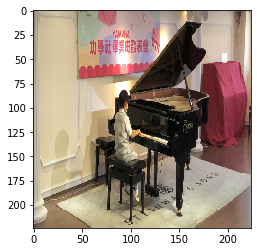

In [21]:
# 看一下圖片以及預測圖片，查看還原效果
import cv2
from PIL import Image


idx = 3
# 原始圖片
img = test_ds[idx] * 255
img = img.astype(np.uint8)
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 52ms/step


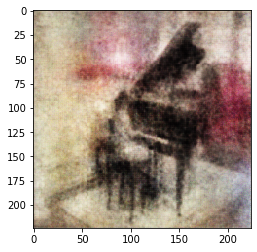

In [22]:
# 預測圖片
pred_img = temp.predict(np.array([img / 255.0]))[0] * 255
pred_img = pred_img.astype(np.uint8)
plt.imshow(pred_img)
plt.show()